# Task for the ML Engineer KTP Associate position (P2)
# A comparative study to solve a regression problem using different ML algorithms
# David Brookes
# February 2022

# Part A

This part requires the production of code to test a number of predictors.
The best predictor will be trained on all the training data and then used in Part B.

In [1]:
# Import libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Set random seed in order to give the same results on multiple executions.
np.random.seed(0)

In [3]:
# Print current working directory (folder).
curr_dir=os.getcwd()
print(curr_dir)

C:\Users\David Brookes\Notebooks\Post-MSc-Projects\Essex KTP2 Tasks\P2


In [4]:
# Change working directory.
# Note: 'r' allows backslashes (and forward slashes) in the file path name.
os.chdir(r"D:\My Documents\Notebooks\Post-MSc-Projects\Essex KTP2 Tasks\P2_Data")
curr_dir=os.getcwd()
print(curr_dir)

D:\My Documents\Notebooks\Post-MSc-Projects\Essex KTP2 Tasks\P2_Data


# Load in the data

In [5]:
# Read in the data P1_data.csv and store as a pandas dataframe.
p2_data_df = pd.read_csv(r"P2_Data.csv")
print(p2_data_df.head())

        F1        F2      F3        F4      F5     F6       F7     F8      F9  \
0   854.04 -15267.84  193.04  12132.20  464.22 -19.81   920.42  11.84  -38.02   
1  1748.76  -4299.45  439.72  18046.14  540.36  -8.55  1913.78  11.28  122.02   
2   834.44 -18927.93  -85.86  18533.56  611.34 -15.88  1956.90  10.00  -24.26   
3  1429.36   3653.73  -59.69  31314.52  408.45  -9.67  1628.18  11.59   90.88   
4   188.80  -3932.07  128.70  22837.34  530.22 -14.93  1218.16   9.55  -93.78   

     F10  ...     F28       F29  F30     F31     F32    F33      F34    F35  \
0   8.35  ... -100.43  10497.32    8  -46.22   91.89 -41.70  -849.78  -5.12   
1  -8.83  ...  -97.41  16792.88    4   51.24 -450.34 -75.30 -1801.59  -0.16   
2 -54.33  ... -135.59  -5647.94    6   40.93 -471.02 -55.50 -2529.75   8.50   
3 -38.87  ...  -85.77   6869.46    2   -9.19 -290.45 -67.86 -2915.34   9.76   
4 -61.95  ...  -75.76  16974.08    2  100.86 -850.10 -64.95 -2154.12  13.42   

       F36   Target  
0  4261.68   609

In [6]:
P2_columns = p2_data_df.columns
print(P2_columns)

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21',
       'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31',
       'F32', 'F33', 'F34', 'F35', 'F36', 'Target'],
      dtype='object')


# Basic data checks

In [7]:
# Print the number of rows and columns in the data.
print(p2_data_df.shape)

(1500, 37)


In [8]:
# How much data is missing? Sort in descending order.
p2_data_df.isnull().sum(axis = 0).sort_values(ascending=False).head()

Target    0
F18       0
F16       0
F15       0
F14       0
dtype: int64

There is no missing data, therefore no imputation techniques required.

In [9]:
# Print the data types of each column in the dataframe.
print(p2_data_df.dtypes)

F1        float64
F2        float64
F3        float64
F4        float64
F5        float64
F6        float64
F7        float64
F8        float64
F9        float64
F10       float64
F11         int64
F12       float64
F13       float64
F14       float64
F15       float64
F16       float64
F17       float64
F18       float64
F19       float64
F20        object
F21       float64
F22       float64
F23       float64
F24       float64
F25       float64
F26       float64
F27        object
F28       float64
F29       float64
F30         int64
F31       float64
F32       float64
F33       float64
F34       float64
F35       float64
F36       float64
Target    float64
dtype: object


Inspection of the data shows variables F20 and F27 are categorical data, 
and therefore must be converted to dummy variables.

In [10]:
# Print summary statistics.
p2_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
F1,1500.0,847.011520,595.115533,-1271.54,441.4350,858.350,1249.0250,2769.66
F2,1500.0,-11736.908600,9055.633907,-43559.91,-17835.6675,-11634.240,-5991.9900,22545.33
F3,1500.0,-236.076500,299.256174,-1466.30,-430.1900,-236.735,-40.2500,789.33
F4,1500.0,24903.095547,5930.199404,4409.78,20806.3950,25064.170,28904.1000,47069.10
F5,1500.0,569.654240,129.856996,24.18,501.3000,567.705,633.5700,1194.48
F6,1500.0,-13.881793,4.227795,-35.66,-15.8875,-13.905,-11.8350,12.23
F7,1500.0,1701.127373,591.284001,34.98,1297.5900,1716.700,2095.6950,3640.98
F8,1500.0,10.154180,4.214935,-8.26,8.0500,10.180,12.1550,27.75
F9,1500.0,-15.809880,82.215588,-398.68,-57.0150,-16.330,25.9700,331.62
F10,1500.0,-55.084673,29.895706,-152.81,-75.0125,-55.550,-35.1900,53.45


# Histograms

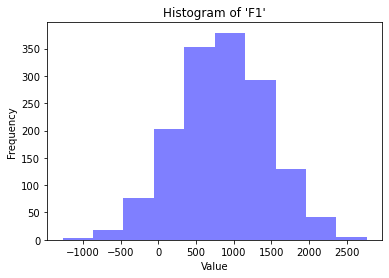

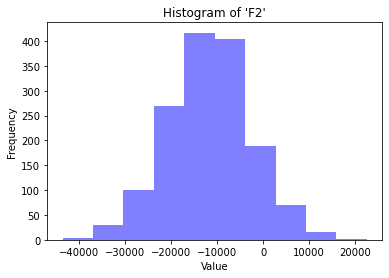

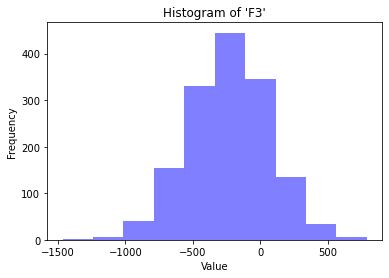

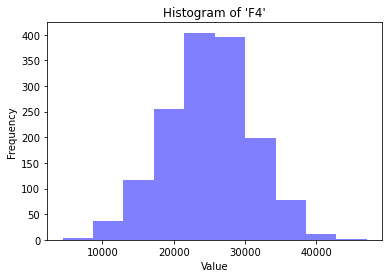

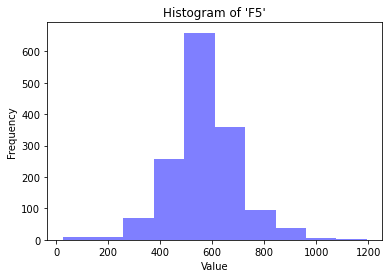

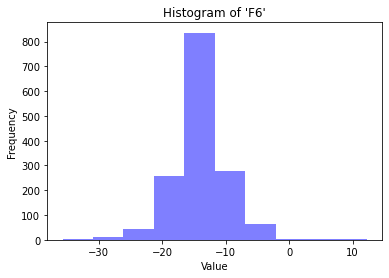

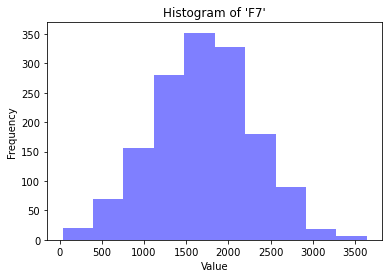

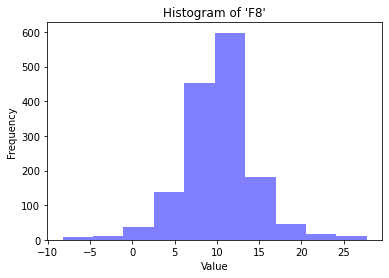

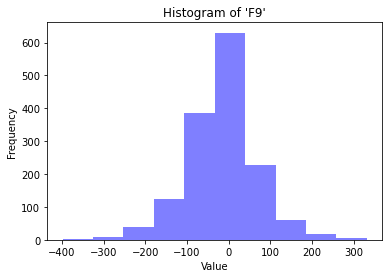

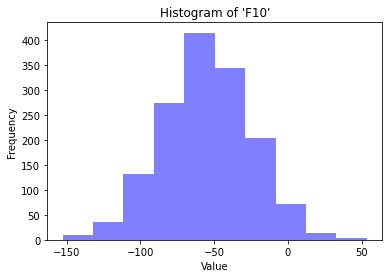

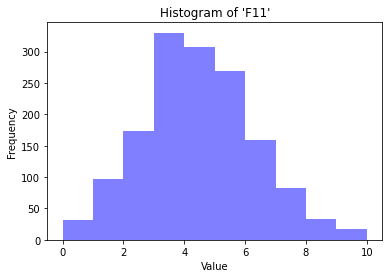

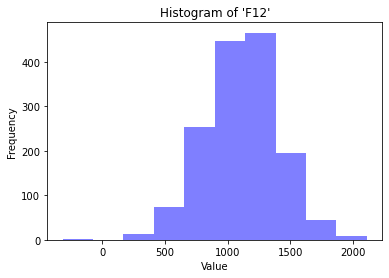

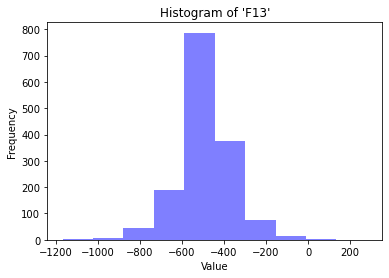

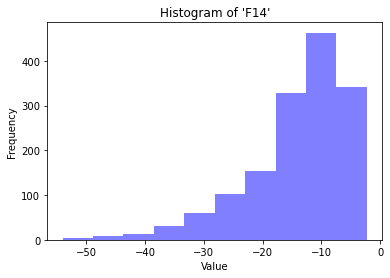

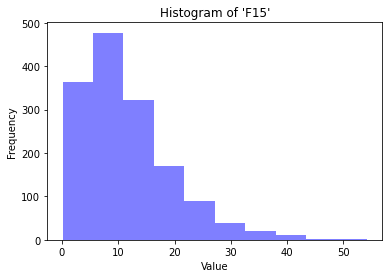

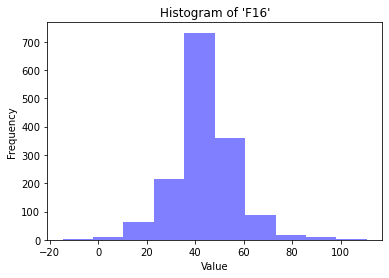

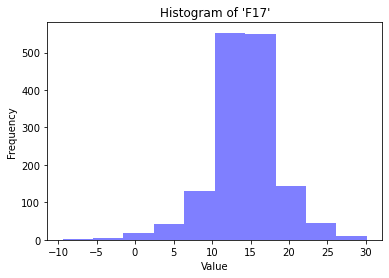

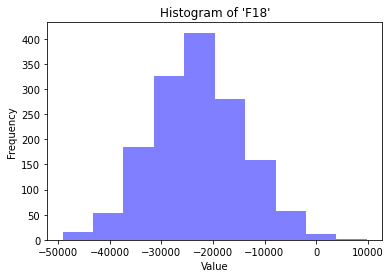

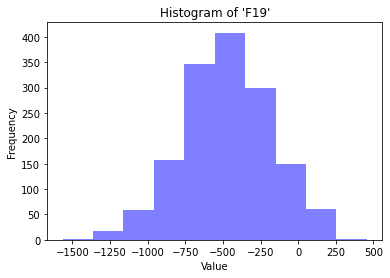

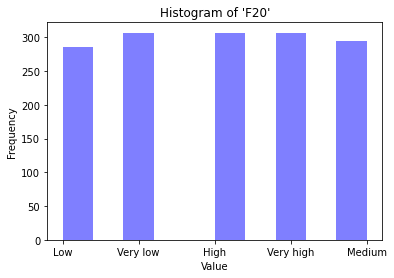

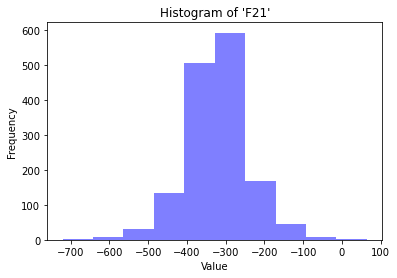

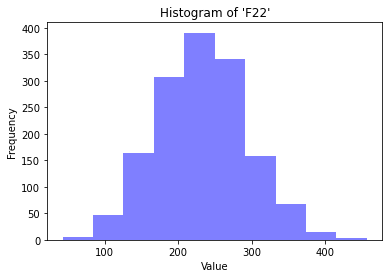

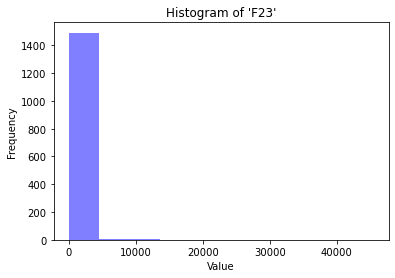

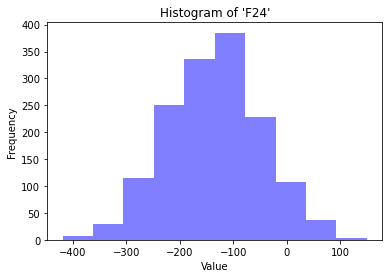

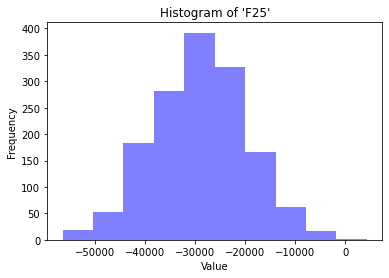

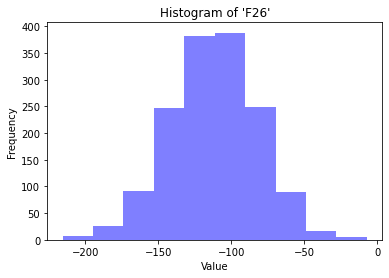

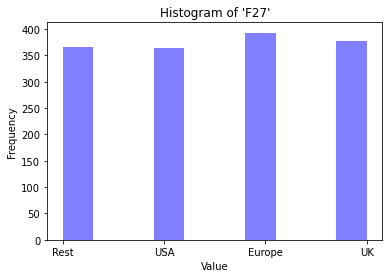

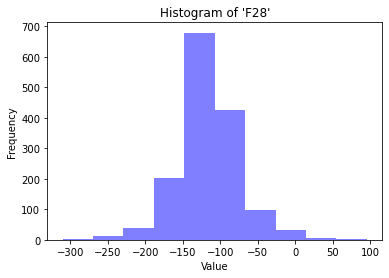

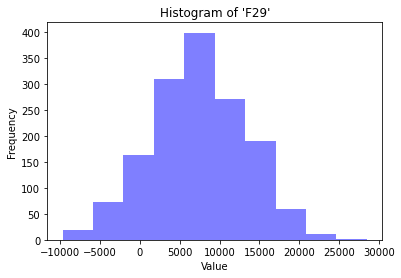

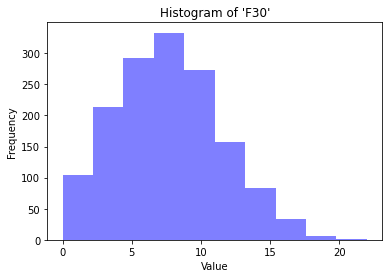

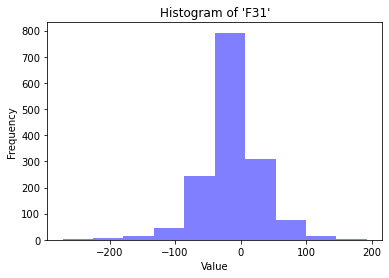

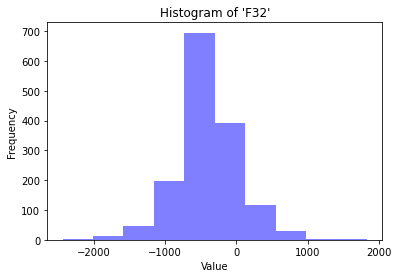

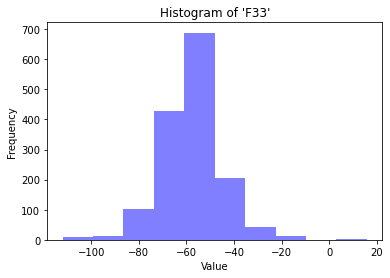

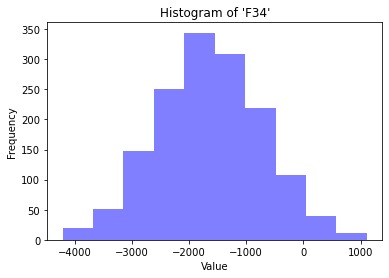

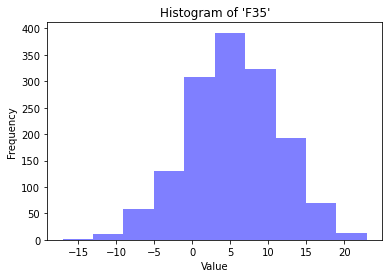

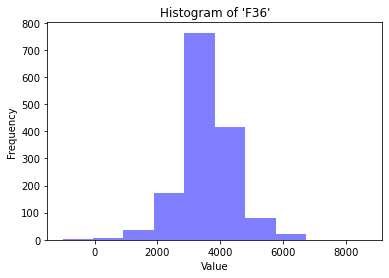

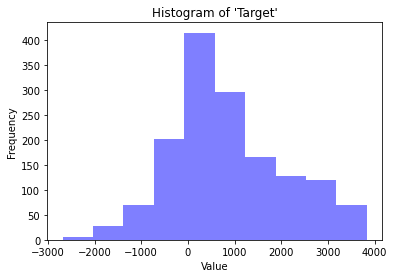

In [11]:
# Use pyplot in matplotlib to plot histograms of the features.
def plot_histogram(x):
    plt.hist(x, color='blue', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    
variables = p2_data_df.columns
for v in variables:
    plot_histogram(p2_data_df[v])

In [12]:
# Look at the value counts of the F20 and F27 features.

print(p2_data_df['F20'].value_counts())
print()
print(p2_data_df['F27'].value_counts())


Very low     307
High         307
Very high    306
Medium       294
Low          286
Name: F20, dtype: int64

Europe    393
UK        378
Rest      365
USA       364
Name: F27, dtype: int64


Note that the features F2, F6 and F16 take on values 0 and 1 only.
Variable F17 is very much concentrated about its mean value but
is skewed with a long tail.

# Standardisation

It can be seen that there is great variation of the range which the features vary.   \
Standardisation or normalisation can sometimes help machine learning algorithms perform better.   \
Standardisation is used here.

In [13]:
# Transform data standardising selected columns.

# Note that the Target variable is also standardised.
# (Therefore any predictions made must undergo the inverse transformation).

dont_transform = ['F20','F27']

def standardise(df, not_these_vars):
    variables = list(df.columns)
    df_stand = df.copy()
    for v in variables:
        #print('var = ', v)
        #print()
        if v not in not_these_vars:
            mean = df[v].mean()
            std = df[v].std()
            df_stand[v] -= mean
            df_stand[v] *= 1/std
            #print('mean ', mean)
            #print('std', std)
        else:
            #print('Do nothing!')
            pass
        #print()
    return(df_stand)
    
p2_data_scaled_df = standardise(p2_data_df, dont_transform)

In [14]:
# Print the head of the scaled data.
print(p2_data_scaled_df.head())

         F1        F2        F3        F4        F5        F6        F7  \
0  0.011810 -0.389915  1.433944 -2.153536 -0.811926 -1.402198 -1.320359   
1  1.515249  0.821307  2.258254 -1.156277 -0.225588  1.261129  0.359645   
2 -0.021125 -0.794094  0.501966 -1.074085  0.321013 -0.472636  0.432572   
3  0.978547  1.699565  0.589416  1.081148 -1.241398  0.996215 -0.123371   
4 -1.106023  0.861877  1.218944 -0.348345 -0.303674 -0.247932 -0.816811   

         F8        F9       F10  ...       F28       F29       F30       F31  \
0  0.399963 -0.270145  2.121866  ...  0.386142  0.520101  0.012910 -0.752296   
1  0.267103  1.676445  1.547201  ...  0.459523  1.578258 -1.126165  1.444690   
2 -0.036579 -0.102780  0.025244  ... -0.468183 -2.193591 -0.556628  1.212278   
3  0.340651  1.297684  0.542375  ...  0.742354 -0.089669 -1.695702  0.082450   
4 -0.143343 -0.948362 -0.229643  ...  0.985579  1.608714 -1.695702  2.563247   

        F32       F33       F34       F35       F36    Target  
0  1

In [15]:
# Print summary statistics.
p2_data_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
F1,1500.0,2.073045e-15,1.0,-3.559900,-0.681509,0.019053,0.675522,3.230715
F2,1500.0,6.987004e-16,1.0,-3.514166,-0.673477,0.011338,0.634403,3.785736
F3,1500.0,-1.545286e-16,1.0,-4.110938,-0.648653,-0.002200,0.654377,3.426517
F4,1500.0,-4.402404e-15,1.0,-3.455755,-0.690820,0.027162,0.674683,3.737818
F5,1500.0,-5.819604e-15,1.0,-4.200576,-0.526381,-0.015011,0.492201,4.811645
F6,1500.0,5.669391e-15,1.0,-5.151198,-0.474410,-0.005489,0.484128,6.176221
F7,1500.0,3.231489e-15,1.0,-2.817846,-0.682476,0.026337,0.667306,3.280746
F8,1500.0,3.726797e-15,1.0,-4.368793,-0.499220,0.006126,0.474698,4.174636
F9,1500.0,-9.251859e-17,1.0,-4.656904,-0.501184,-0.006326,0.508175,4.225840
F10,1500.0,1.474376e-15,1.0,-3.268875,-0.666578,-0.015565,0.665469,3.630444


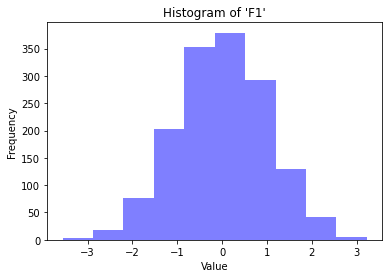

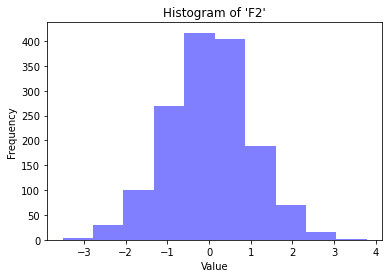

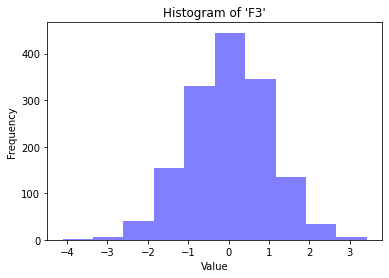

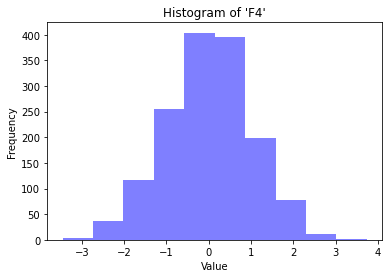

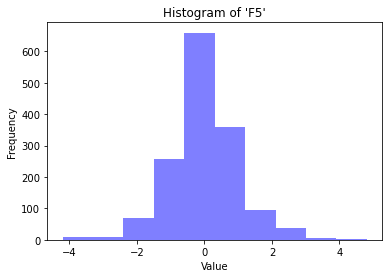

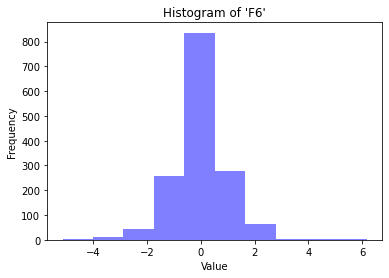

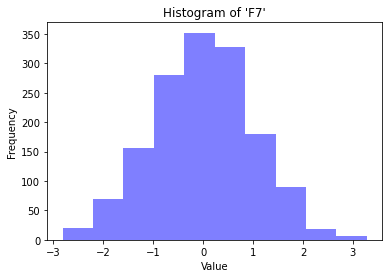

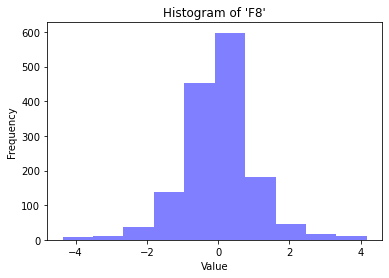

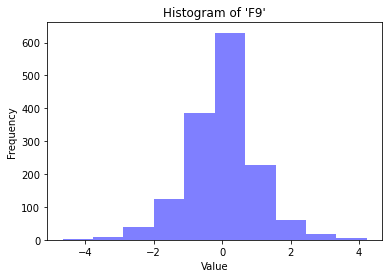

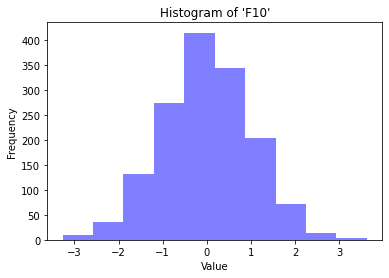

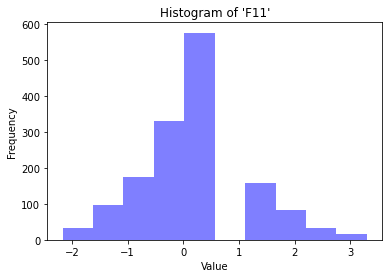

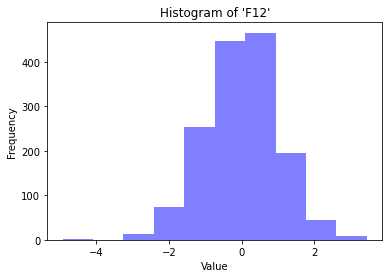

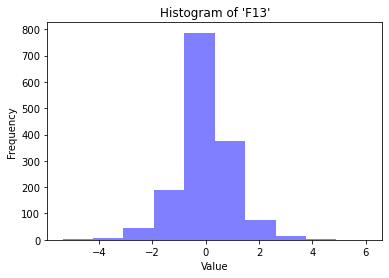

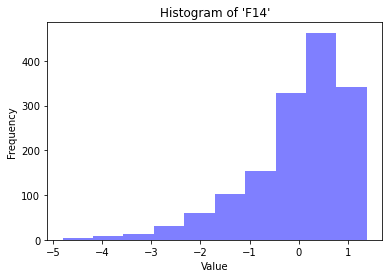

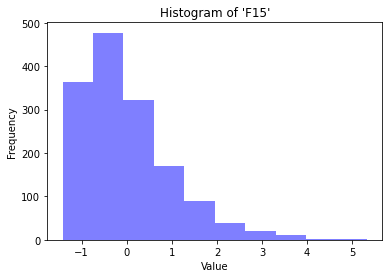

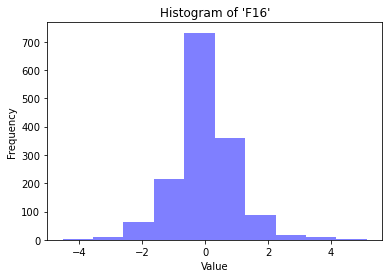

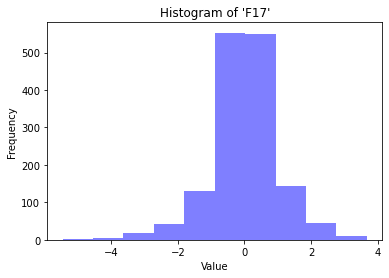

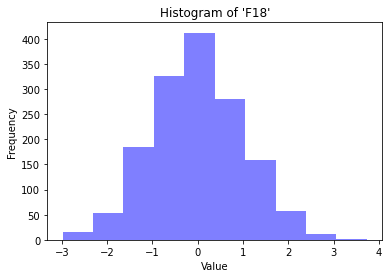

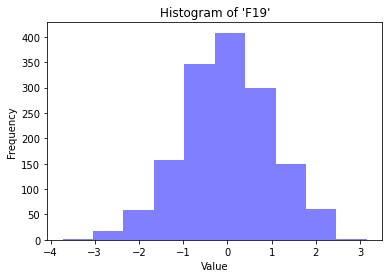

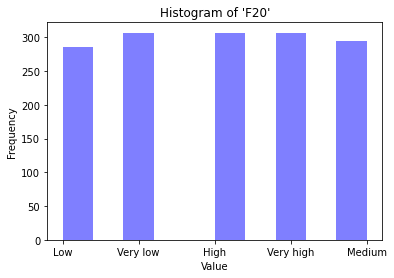

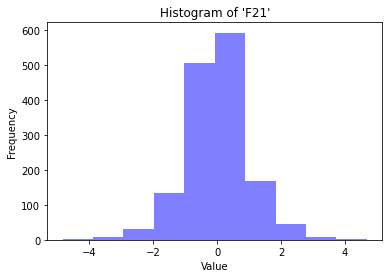

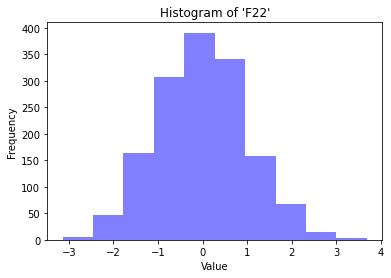

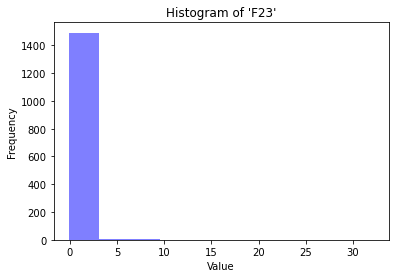

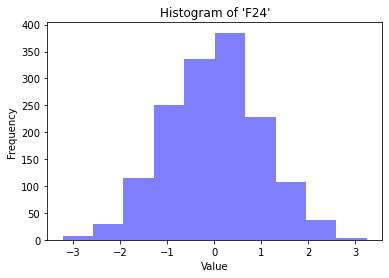

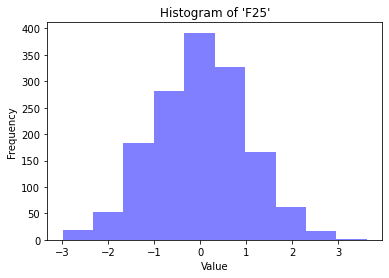

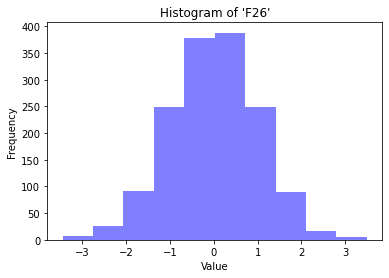

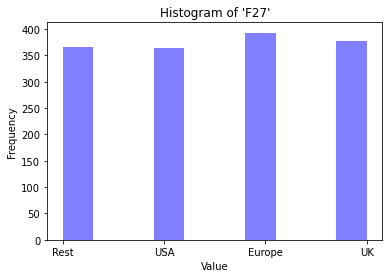

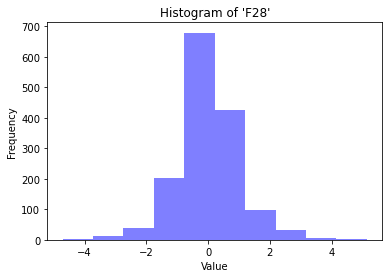

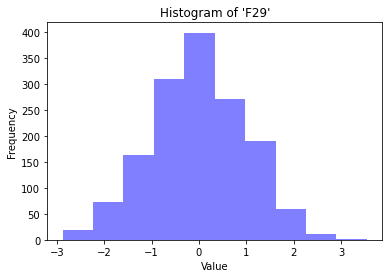

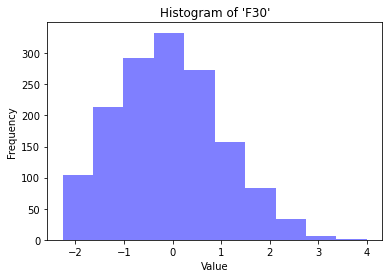

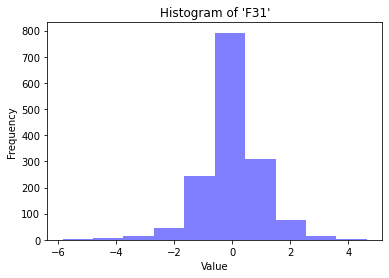

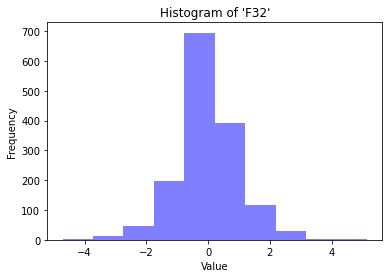

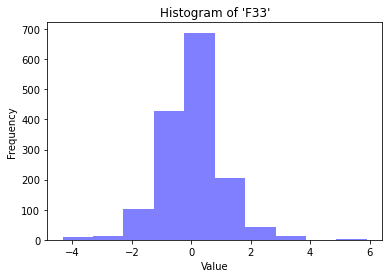

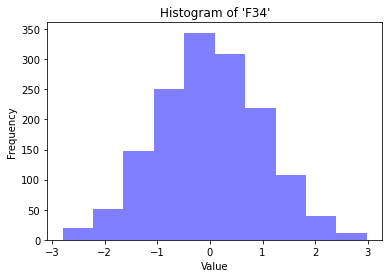

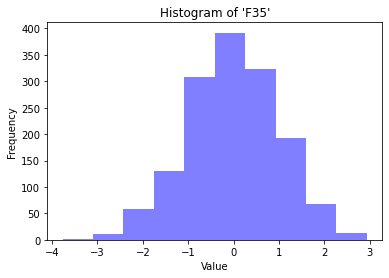

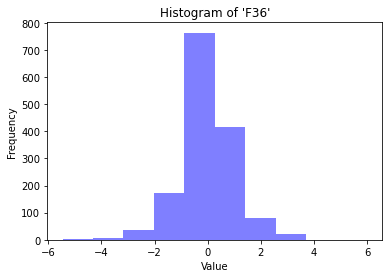

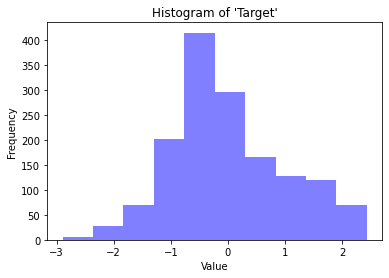

In [16]:
variables = p2_data_scaled_df.columns
for v in variables:
    plot_histogram(p2_data_scaled_df[v])

# Create dummy variables

In [17]:
# Create a list of features to dummy.
todummy_list = ['F20', 'F27'] 

# Function to dummy all the categorical variables used for modelling.
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

p2_data_scaled_df = dummy_df(p2_data_scaled_df, todummy_list)
print(p2_data_scaled_df.head(5))

         F1        F2        F3        F4        F5        F6        F7  \
0  0.011810 -0.389915  1.433944 -2.153536 -0.811926 -1.402198 -1.320359   
1  1.515249  0.821307  2.258254 -1.156277 -0.225588  1.261129  0.359645   
2 -0.021125 -0.794094  0.501966 -1.074085  0.321013 -0.472636  0.432572   
3  0.978547  1.699565  0.589416  1.081148 -1.241398  0.996215 -0.123371   
4 -1.106023  0.861877  1.218944 -0.348345 -0.303674 -0.247932 -0.816811   

         F8        F9       F10  ...    Target  F20_High  F20_Low  F20_Medium  \
0  0.399963 -0.270145  2.121866  ... -0.202315         0        1           0   
1  0.267103  1.676445  1.547201  ... -0.510143         0        0           0   
2 -0.036579 -0.102780  0.025244  ... -0.307871         1        0           0   
3  0.340651  1.297684  0.542375  ...  0.677679         0        0           0   
4 -0.143343 -0.948362 -0.229643  ... -0.195062         1        0           0   

   F20_Very high  F20_Very low  F27_Europe  F27_Rest  F27_UK  

# GridsearchCV

GridsearchCV is a routine from sklearn that facilitates hyperparameter tuning   \
by trying various combinations of machine learning parameter values and   \
evaluating the performance using K fold cross validation with the appropriate metric.   \
In this case the metric is the coefficient of determination $R^2$.

In [18]:
def gridsearchcv(X, y, model, params):

    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='r2', return_train_score=True)

    grid_search.fit(X, y)
    #print('grid_search.best_params_', grid_search.best_params_)
    #print('grid_search.best_score_', grid_search.best_score_)
    #print('grid_search.best_estimator', grid_search.best_estimator_)
    #print()
    
    # Return the best model (estimator) and best score.
    return(grid_search.best_estimator_, grid_search.best_score_)


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

regressor_names = ['linear_regression', 'knn_reg', 'svm_reg', 'adaboost_reg']

linreg = LinearRegression()
elastnet = ElasticNet()
svmreg = SVR()
adareg = AdaBoostRegressor(LinearRegression())

regressors = [linreg, elastnet, svmreg, adareg]

param_grid_linreg = [
 {},
 ]

param_grid_elastnet = [
 {'alpha': [0.5, 1.0, 1.5], 'l1_ratio': [0.25, 0.5, 0.75]}
 ]

param_grid_svm = [
 {'C': [0.5, 1.0, 1.5, 2.0], 'epsilon': [0.05, 0.1]}
 ]

param_grid_adareg = [
 {'n_estimators': [5, 50, 150, 500, 1000], 'learning_rate': [0.1, 0.5, 1.0, 10]}
 ]

params = [param_grid_linreg, param_grid_elastnet, param_grid_svm, param_grid_adareg]

regressor_params = list(zip(regressors, params))

regressor_dict = dict(zip(regressor_names, regressor_params))

# Note that R2 is the coefficient of determination.
regressor_results_df = pd.DataFrame(index = regressor_names, columns=['R2']) 

overall_best_model = None
overall_best_score = 0

X = p2_data_scaled_df.drop(columns='Target')
y = p2_data_scaled_df['Target']

for reg_name in regressor_names:
    reg, p = regressor_dict[reg_name]
    best_model, best_score = gridsearchcv(X, y, reg, p)
    print('best model', best_model)
    print('best score', best_score)

    # Store the score in a data frame.
    regressor_results_df.loc[reg_name, 'R2'] = best_score
    if best_score > overall_best_score:
        overall_best_model = best_model
        overall_best_score = best_score       
    print()

print(regressor_results_df)
print()

print('Overall best model: ', overall_best_model)
print('Overall best score: ', overall_best_score)
print()
        
# Fit all of the data using this model.
overall_best_model.fit(X, y)

best model LinearRegression()
best score 0.6353341801283314

best model ElasticNet(alpha=0.5, l1_ratio=0.25)
best score 0.32397001350433985

best model SVR(C=1.5)
best score 0.6224676634572972

best model AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=1000)
best score 0.6609006958491832

                         R2
linear_regression  0.635334
knn_reg             0.32397
svm_reg            0.622468
adaboost_reg       0.660901

Overall best model:  AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=1000)
Overall best score:  0.6609006958491832



AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=1000)

In [20]:
# Quick test below to see how the best model performs on the whole of the training data.
# Calculate the R2 score of the prediction for the Target y.

from sklearn.metrics import r2_score

y_pred = overall_best_model.predict(X)

print('R2 score of best model on the training data: ', r2_score(y, y_pred))

R2 score of best model on the training data:  0.7097497840236735


In [21]:
# Calculate R2 using unstandardised Target values (as a check to see if there's a difference).
mean = p2_data_df['Target'].mean()
std = p2_data_df['Target'].std()

y_unstandardised = p2_data_df['Target'] 

y_pred_unstandardised = mean + std*y_pred

print('(Unstandardised) R2 score of best model on the training data: ', r2_score(y_unstandardised, y_pred_unstandardised))

(Unstandardised) R2 score of best model on the training data:  0.7097497840236735


In [22]:
print(regressor_results_df)

                         R2
linear_regression  0.635334
knn_reg             0.32397
svm_reg            0.622468
adaboost_reg       0.660901


# Bar chart of regressor results

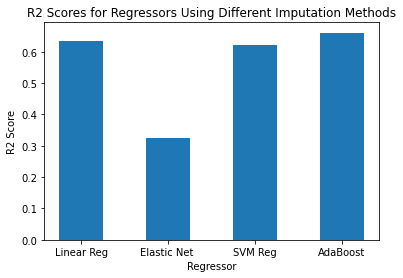

In [23]:
import matplotlib.pyplot as plt
   
regressor_long_names = ['Linear Reg', 'Elastic Net ', 'SVM Reg', 'AdaBoost']
R2_values = regressor_results_df['R2']

plt.bar(regressor_long_names, R2_values, width = 0.5)
plt.title('R2 Scores for Regressors Using Different Imputation Methods')
plt.xlabel('Regressor')
plt.ylabel('R2 Score')
plt.show()

### Part B

Predictions are made on a test data set that does not contain Target values.

In [24]:
# Load the test data
test_df = pd.read_csv('P2_Test.csv')

# Copy all but the last column 'Target'.
test_data = test_df.iloc[:,:-1].copy()

print(test_data.head())

        F1        F2      F3        F4      F5     F6       F7     F8     F9  \
0  1209.10  -6727.56 -417.86  29985.68  483.00 -12.62   599.56  14.63  35.44   
1  1027.20   1509.39 -152.59  23458.60  575.37 -17.69  1801.36   7.33  52.02   
2  1146.04    367.26  -93.47  18350.24  511.86 -18.92  1621.66  10.80  29.78   
3   452.64 -14607.60   73.16  23934.94  671.04 -14.73  2311.62   9.61 -24.52   
4   861.74 -16186.68 -781.53  26840.00  556.98 -11.88  1207.46  10.89  13.58   

      F10  ...     F27     F28       F29  F30    F31     F32    F33      F34  \
0  -47.63  ...    Rest -126.65  12004.34   14  -2.26 -865.92 -70.83 -3121.86   
1 -106.12  ...      UK -104.42   3227.10   12 -71.25 -111.20 -58.05  -870.39   
2  -52.25  ...    Rest -161.15   4538.24   10 -31.63 -270.24 -64.47 -2605.53   
3  -93.10  ...     USA -111.41  10655.60   12   5.77    5.01 -58.74 -1270.80   
4  -53.09  ...  Europe -110.52  11975.04    6  -6.67 -110.19 -42.33  -941.19   

    F35      F36  
0  0.06  2486.18  


# Histograms

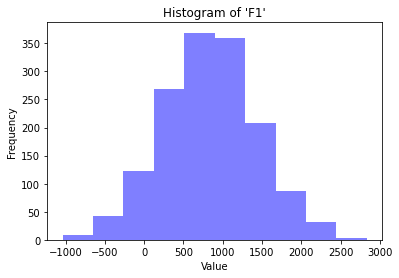

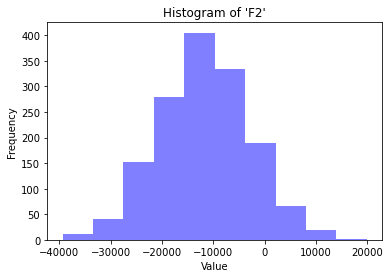

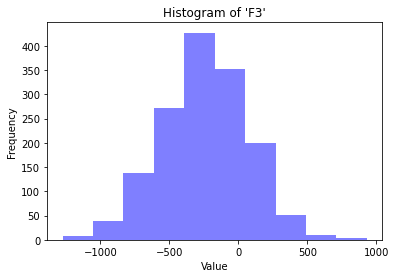

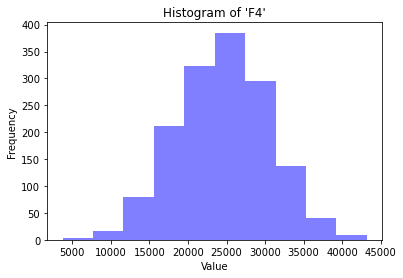

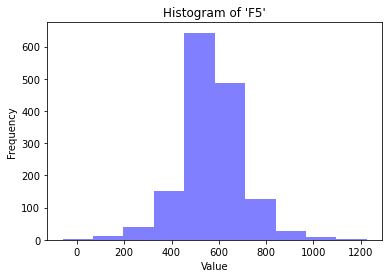

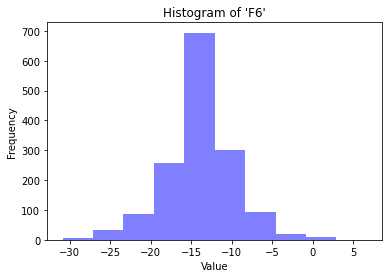

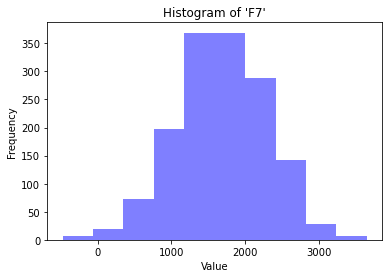

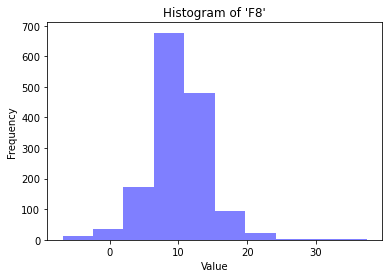

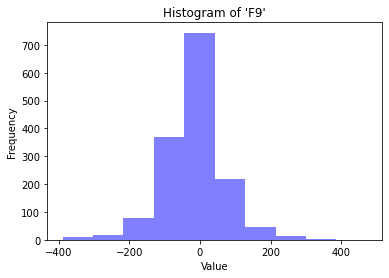

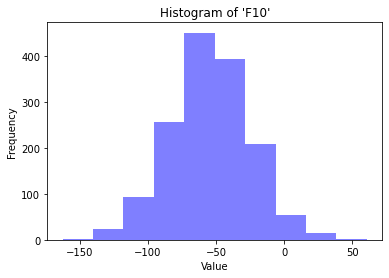

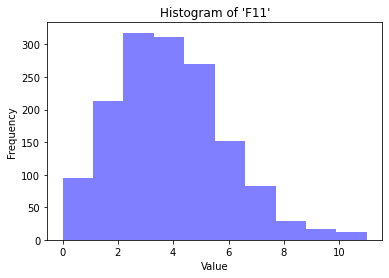

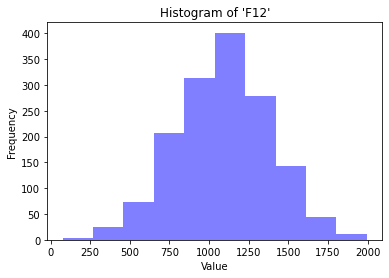

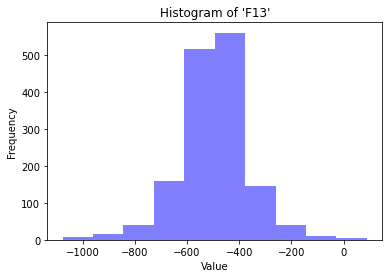

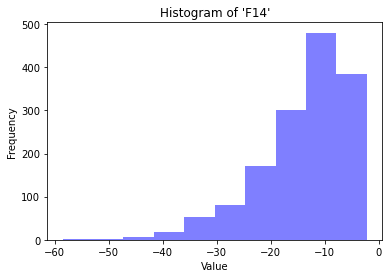

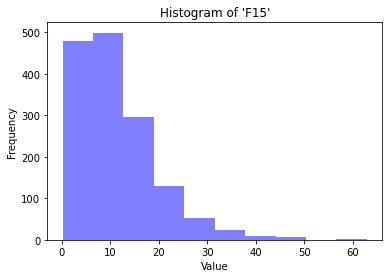

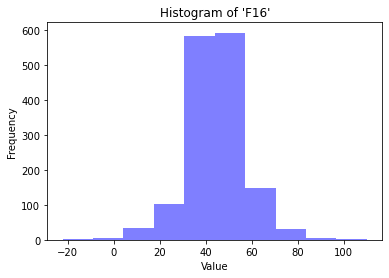

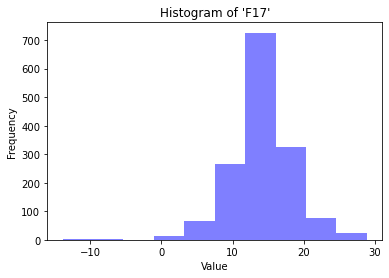

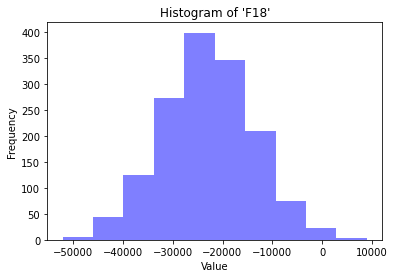

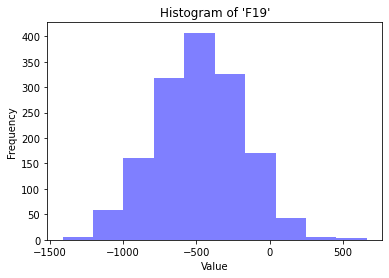

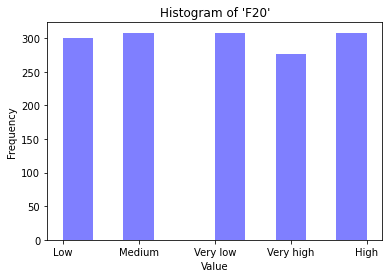

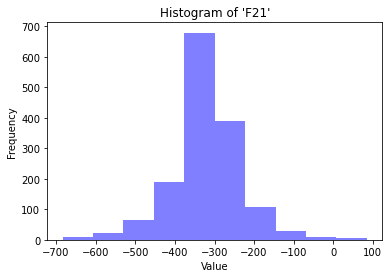

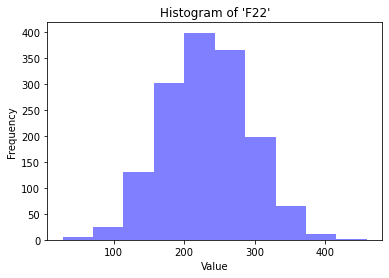

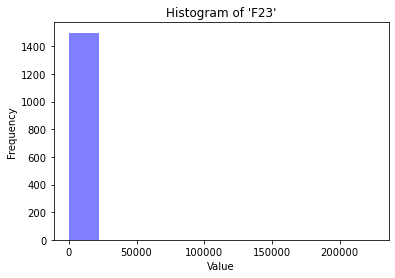

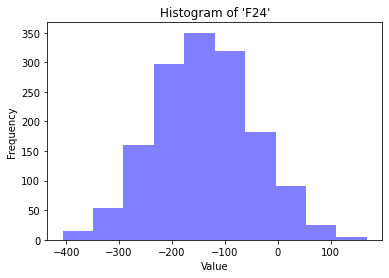

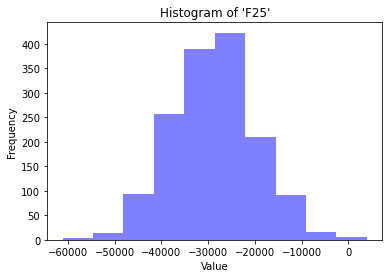

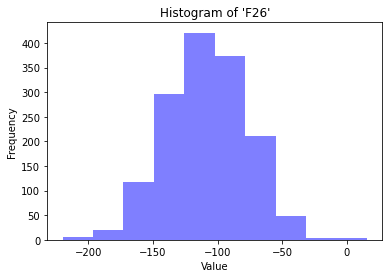

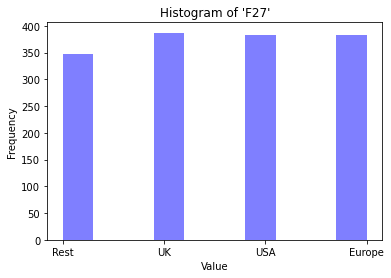

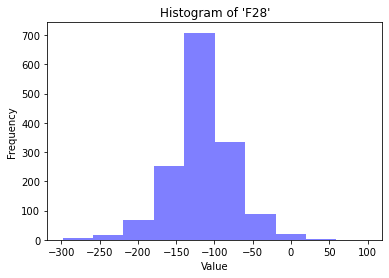

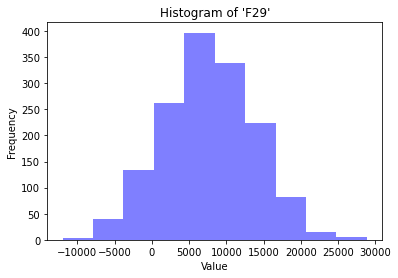

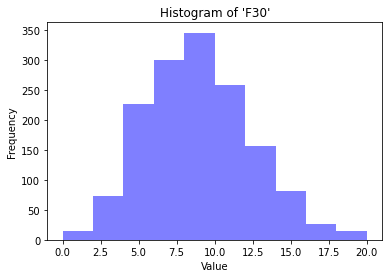

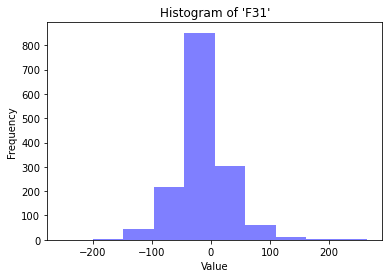

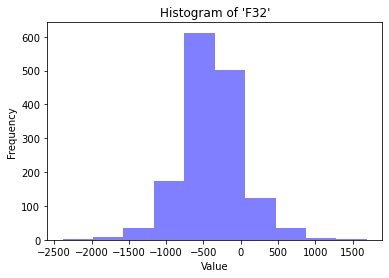

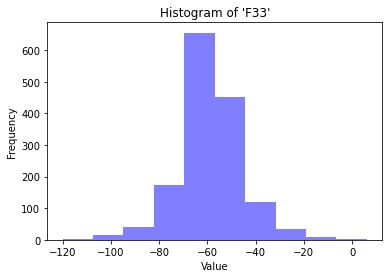

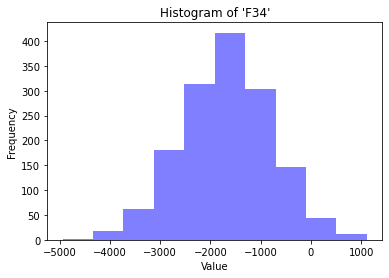

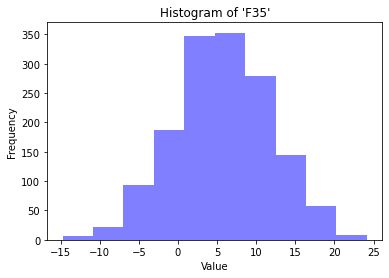

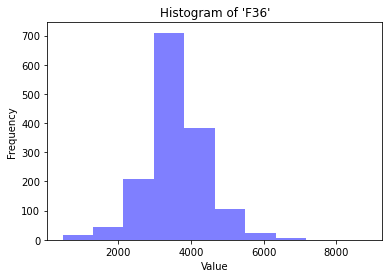

In [25]:
# Plot histograms of the data.
variables = test_data.columns
for v in variables:
    plot_histogram(test_data[v])

# Standardisation

In [26]:
# Transform data standardising selected columns.

dont_transform = ['F20','F27']
    
test_data_scaled_df = standardise(test_data, dont_transform)

print(type(test_data_scaled_df))
print(test_data_scaled_df.head())

<class 'pandas.core.frame.DataFrame'>
         F1        F2        F3        F4        F5        F6        F7  \
0  0.616038  0.561617 -0.571887  0.915075 -0.665480  0.299580 -1.783421   
1  0.311420  1.486027  0.283210 -0.184823  0.041208 -0.882023  0.187735   
2  0.510435  1.357849  0.473783 -1.045648 -0.444683 -1.168684 -0.107003   
3 -0.650761 -0.322738  1.010914 -0.104553  0.773143 -0.192172  1.024648   
4  0.034334 -0.499953 -1.744176  0.384987 -0.099487  0.472043 -0.786362   

         F8        F9       F10  ...     F27       F28       F29       F30  \
0  1.039346  0.616843  0.227250  ...    Rest -0.264973  0.729548  1.733948   
1 -0.676628  0.814479 -1.762969  ...      UK  0.269576 -0.724936  1.160299   
2  0.139047  0.549375  0.070047  ...    Rest -1.094569 -0.507666  0.586651   
3 -0.140680 -0.097889 -1.319942  ...     USA  0.101492  0.506047  1.160299   
4  0.160203  0.356269  0.041464  ...  Europe  0.122893  0.724692 -0.560646   

        F31       F32       F33       F34 

# Create dummy variables

In [27]:
# Create a list of features to dummy.
todummy_list = ['F20', 'F27'] 

test_data_scaled_df = dummy_df(test_data_scaled_df, todummy_list)
print(test_data_scaled_df.head(5))

         F1        F2        F3        F4        F5        F6        F7  \
0  0.616038  0.561617 -0.571887  0.915075 -0.665480  0.299580 -1.783421   
1  0.311420  1.486027  0.283210 -0.184823  0.041208 -0.882023  0.187735   
2  0.510435  1.357849  0.473783 -1.045648 -0.444683 -1.168684 -0.107003   
3 -0.650761 -0.322738  1.010914 -0.104553  0.773143 -0.192172  1.024648   
4  0.034334 -0.499953 -1.744176  0.384987 -0.099487  0.472043 -0.786362   

         F8        F9       F10  ...       F36  F20_High  F20_Low  F20_Medium  \
0  1.039346  0.616843  0.227250  ... -1.334713         0        1           0   
1 -0.676628  0.814479 -1.762969  ... -0.918368         0        0           1   
2  0.139047  0.549375  0.070047  ... -1.579319         0        1           0   
3 -0.140680 -0.097889 -1.319942  ... -2.463948         0        0           0   
4  0.160203  0.356269  0.041464  ...  0.807986         0        0           1   

   F20_Very high  F20_Very low  F27_Europe  F27_Rest  F27_UK  

# Produce predictions and write to CSV file

In [29]:
# Use the best model found earlier to make predictions.
X_test = test_data_scaled_df

predicted = overall_best_model.predict(X_test)
predicted_df = pd.DataFrame(predicted)
print(predicted_df.head())

# Need to convert the predicted values from 'standardised form'.
mean = p2_data_df['Target'].mean()
std = p2_data_df['Target'].std()

predicted = mean + std*predicted
   
# Replace the last (empty) column with the prediction.
test_df.iloc[:,-1] = predicted

print(test_df.head())

# Save to the destination file.
test_df.to_csv('P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed.
assert pd.read_csv('P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('P2_Test_Predictions.csv').iloc[:,:-1])

          0
0 -0.928955
1 -1.596558
2 -0.750000
3 -1.372803
4  1.388916
        F1        F2      F3        F4      F5     F6       F7     F8     F9  \
0  1209.10  -6727.56 -417.86  29985.68  483.00 -12.62   599.56  14.63  35.44   
1  1027.20   1509.39 -152.59  23458.60  575.37 -17.69  1801.36   7.33  52.02   
2  1146.04    367.26  -93.47  18350.24  511.86 -18.92  1621.66  10.80  29.78   
3   452.64 -14607.60   73.16  23934.94  671.04 -14.73  2311.62   9.61 -24.52   
4   861.74 -16186.68 -781.53  26840.00  556.98 -11.88  1207.46  10.89  13.58   

      F10  ...     F28       F29  F30    F31     F32    F33      F34   F35  \
0  -47.63  ... -126.65  12004.34   14  -2.26 -865.92 -70.83 -3121.86  0.06   
1 -106.12  ... -104.42   3227.10   12 -71.25 -111.20 -58.05  -870.39  6.68   
2  -52.25  ... -161.15   4538.24   10 -31.63 -270.24 -64.47 -2605.53  6.78   
3  -93.10  ... -111.41  10655.60   12   5.77    5.01 -58.74 -1270.80  6.04   
4  -53.09  ... -110.52  11975.04    6  -6.67 -110.19 -42.